In [3]:
import pandas as pd 

data = pd.read_csv('happyscore_income.csv')
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
0,Armenia,37.0,4.9,2.42,2096.76,1731.506667,31.445556,'Central and Eastern Europe',4.350,0.76821,Armenia
1,Angola,26.0,4.3,3.19,1448.88,1044.240000,42.720000,'Sub-Saharan Africa',4.033,0.75778,Angola
2,Argentina,60.0,7.1,1.91,7101.12,5109.400000,45.475556,'Latin America and Caribbean',6.574,1.05351,Argentina
3,Austria,59.0,7.2,2.11,19457.04,16879.620000,30.296250,'Western Europe',7.200,1.33723,Austria
4,Australia,65.0,7.6,1.80,19917.00,15846.060000,35.285000,'Australia and New Zealand',7.284,1.33358,Australia


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                111 non-null    object 
 1   adjusted_satisfaction  111 non-null    float64
 2   avg_satisfaction       111 non-null    float64
 3   std_satisfaction       111 non-null    float64
 4   avg_income             111 non-null    float64
 5   median_income          111 non-null    float64
 6   income_inequality      111 non-null    float64
 7   region                 111 non-null    object 
 8   happyScore             111 non-null    float64
 9   GDP                    111 non-null    float64
 10  country.1              111 non-null    object 
dtypes: float64(8), object(3)
memory usage: 9.7+ KB


In [5]:
data.describe()

,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,happyScore,GDP
count,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000,111.000000
mean,48.729730,5.936937,2.124595,6442.751416,5186.005304,38.417805,5.421910,0.841909
std,12.364131,1.356394,0.316546,6479.533692,5587.037239,8.375557,1.180801,0.387591
min,19.000000,2.500000,1.380000,572.880000,415.480000,24.215000,2.839000,0.015300
25%,40.000000,5.100000,1.910000,1519.388684,1167.717333,32.182857,4.568000,0.509930
50%,48.000000,6.000000,2.130000,3889.320000,2646.973333,36.480000,5.268000,0.918610
75%,57.000000,7.000000,2.330000,7867.402500,6581.124643,43.380000,6.392000,1.149485
max,74.000000,8.500000,3.190000,26182.275000,22240.230000,63.726667,7.587000,1.563910


In [6]:
from sklearn.cluster import KMeans 
import numpy as np
import matplotlib.pyplot as plt 



X= data['avg_income']
y= data['happyScore']

income_happy = np.column_stack((X,y))
Km_res = KMeans(n_clusters=3).fit(income_happy)
clus_centers= Km_res.cluster_centers_
clus_centers



/home/ml/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[2.19912121e+03, 4.75472308e+00],
       [1.87593022e+04, 7.03270000e+00],
       [7.57755711e+03, 5.85080769e+00]])

Text(0.5, 0, 'Income')

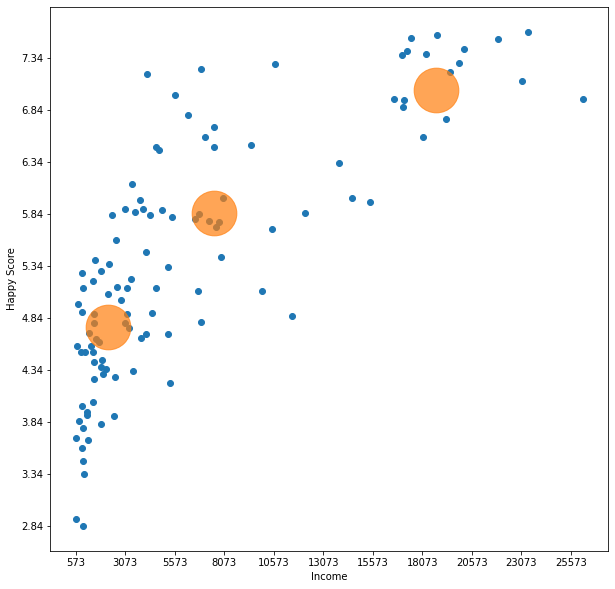

In [7]:
"""Graphic avg income vs Happy score"""
y_np = np.array(y)
x_np = np.array(X)

plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.scatter(clus_centers[:,0],clus_centers[:,1],s=2000, alpha=0.7)

plt.yticks(np.arange(y_np.min(), y_np.max(), step=0.5))
plt.xticks(np.arange(x_np.min(),x_np.max(),step=2500))
plt.ylabel('Happy Score')
plt.xlabel('Income')


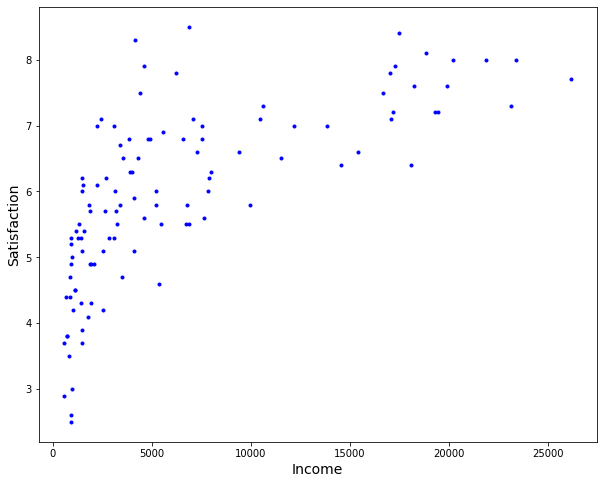

In [8]:
"""Graphic avg satisfaction vs avg income"""
plt.figure(figsize=(10,8))
plt.plot(data['avg_income'],data['avg_satisfaction'], "b.")
plt.ylabel("Satisfaction", fontsize=14)
plt.xlabel("Income", fontsize=14)
plt.show()

<Axes: >

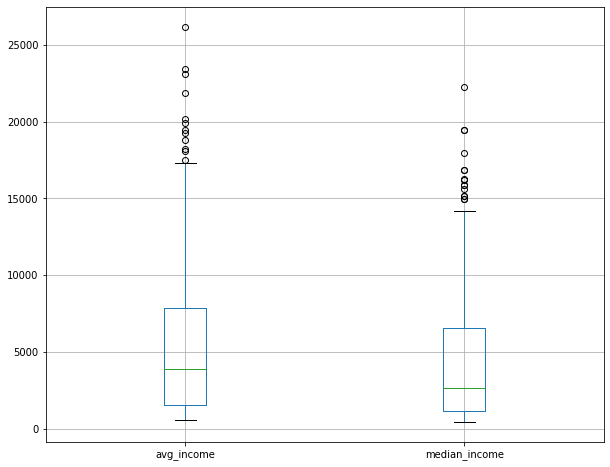

In [9]:
""" Boxplot avg income and median income"""
plt.figure(figsize=(10,8))
data.boxplot(grid=True, column=['avg_income', 'median_income'])


In [10]:
data.sort_values('income_inequality',inplace=True)
data.head()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
5,Azerbaijan,46.0,5.8,2.27,3381.600,2931.480,24.215000,'Central and Eastern Europe',5.212,1.02389,Azerbaijan
91,Slovenia,57.0,7.0,2.14,12174.765,11071.995,24.678750,'Central and Eastern Europe',5.848,1.18498,Slovenia
103,Ukraine,39.0,5.1,2.44,4129.680,3643.520,26.271111,'Central and Eastern Europe',4.681,0.79907,Ukraine
24,Czech Republic,54.0,6.6,2.13,9430.905,8363.370,26.413750,'Central and Eastern Europe',6.505,1.17898,Czech Republic
90,Sweden,67.0,7.8,1.72,17032.755,15166.605,26.950000,'Western Europe',7.364,1.33171,Sweden


In [11]:
data.tail()

,country,adjusted_satisfaction,avg_satisfaction,std_satisfaction,avg_income,median_income,income_inequality,region,happyScore,GDP,country.1
21,Colombia,65.0,7.9,2.09,4618.062857,2618.674286,54.815714,'Latin America and Caribbean',6.477,0.91861,Colombia
109,Zambia,37.0,5.0,2.61,956.760000,510.060000,55.120000,'Sub-Saharan Africa',5.129,0.47038,Zambia
40,Honduras,55.0,7.0,2.46,3080.440000,1757.840000,55.805556,'Latin America and Caribbean',4.788,0.59532,Honduras
14,Botswana,36.0,4.7,2.42,3484.680000,1632.600000,60.460000,'Sub-Saharan Africa',4.332,0.99355,Botswana
108,South Africa,49.0,6.3,2.47,3889.320000,1506.400000,63.726667,'Sub-Saharan Africa',4.642,0.92049,South Africa


Text(0.5, 0, 'inequality')

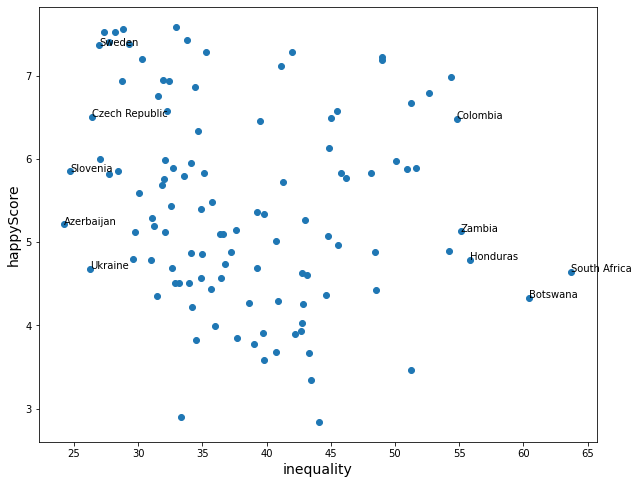

In [12]:
"""Graphic income inequality vs Happy Score"""
X = data['income_inequality']
y = data['happyScore']
z = data['country']

plt.figure(figsize=(10,8))
plt.scatter(X,y)
for i in range(111):
    if i < 5 or i >105:
        plt.text(X.iloc[i] ,y.iloc[i] ,s=z.iloc[i])
plt.ylabel('happyScore', fontsize = 14)
plt.xlabel('inequality', fontsize = 14)

In [13]:
y = data['happyScore'].values

X = data.drop(['happyScore', 'country', 'region', 'country.1'] ,axis =1)



In [14]:
X.shape, y.shape

((111, 7), (111,))

In [15]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

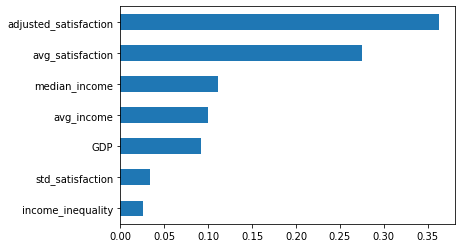

In [16]:
"""Feature importances"""
feat_importance = pd.Series(model.feature_importances_,index=X.columns)
figure = feat_importance.sort_values(ascending=True).plot(kind='barh')
plt.show()

In [17]:
matrix_corr = data.corr()
matrix_corr.happyScore.sort_values()

/tmp/ipykernel_7369/3403097865.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = data.corr()


std_satisfaction        -0.457896
income_inequality       -0.187222
median_income            0.760328
avg_income               0.782122
GDP                      0.790061
avg_satisfaction         0.885988
adjusted_satisfaction    0.901213
happyScore               1.000000
Name: happyScore, dtype: float64

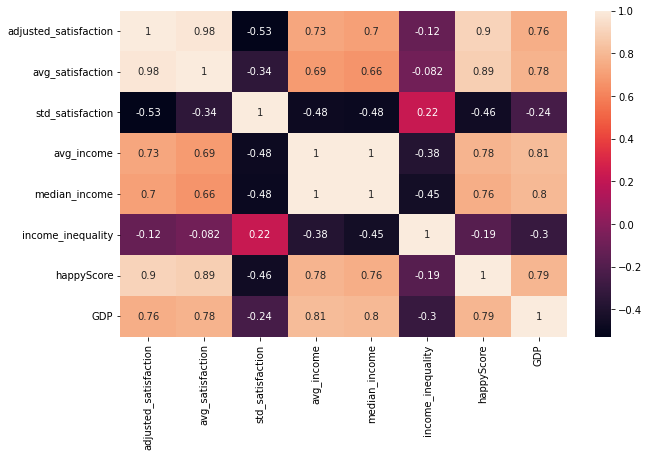

In [18]:
"""Correlation matrix"""
import seaborn as sns 
plt.figure(figsize=(10,6))
sns.heatmap(matrix_corr, annot= True)
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures , StandardScaler


poly_features = PolynomialFeatures(degree=5, include_bias=False)

X_poly = poly_features.fit_transform(X)

scaler = StandardScaler()

X_scaler = scaler.fit_transform(X)


In [20]:
"""Training the model"""

from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse


X_model = [X, X_poly, X_scaler]
pipelines = []
pipelines.append(('LR', Pipeline([('LR',LinearRegression())])))
pipelines.append(('LASSO', Pipeline([('LASSO', Lasso())])))
pipelines.append(('ElasticNet', Pipeline([('ElasticNet', ElasticNet())])))
pipelines.append(('Rigde', Pipeline([('Rigde', Ridge())])))
pipelines.append(('KNN', Pipeline([('KNN', KNeighborsRegressor())])))
pipelines.append(('Decs_tree', Pipeline([('Decs_tree', DecisionTreeRegressor())])))

results = []
model_results = []

for i in X_model:
    X_train, X_test, y_train, y_test = train_test_split(i,y,random_state=11, test_size=0.20)
    for name, model in pipelines:

        model.fit(X_train,y_train)
        model_score = model.score(X_test, y_test)
        Predictions = model.predict(X_test)

        mse_score =   mse(y_test, Predictions)
        mae_score = mae(y_test, Predictions)
        
        results = [name, model_score, mse_score, mae_score]
        model_results.append(results)

       
        
        msg = "%s: %f, %f, %f " % (name, model_score, mse_score, mae_score)
        print(msg)



LR: 0.879183, 0.151654, 0.311951 
LASSO: 0.873270, 0.159076, 0.334699 
ElasticNet: 0.880712, 0.149736, 0.324262 
Rigde: 0.881183, 0.149144, 0.309425 
KNN: 0.607424, 0.492778, 0.556652 
Decs_tree: 0.750598, 0.313061, 0.437348 
LR: -8507720.275280, 10679256.627870, 901.942041 


/home/ml/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.121e-01, tolerance: 1.195e-02
  model = cd_fast.enet_coordinate_descent(
/home/ml/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.082e-01, tolerance: 1.195e-02
  model = cd_fast.enet_coordinate_descent(
/home/ml/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.234e+00, to

LASSO: 0.846215, 0.193037, 0.328055 
ElasticNet: 0.863838, 0.170916, 0.312108 
Rigde: 0.418763, 0.729594, 0.692746 
KNN: 0.605394, 0.495327, 0.551861 
Decs_tree: 0.621614, 0.474966, 0.513435 
LR: 0.879183, 0.151654, 0.311951 
LASSO: -0.220036, 1.531441, 1.056620 
ElasticNet: 0.528232, 0.592183, 0.661295 
Rigde: 0.874690, 0.157294, 0.314874 
KNN: 0.837778, 0.203628, 0.378548 
Decs_tree: 0.713259, 0.359930, 0.461304 


In [33]:
"""Best model"""
best_model = max(model_results) 
print("Model:", best_model[0], ",Score:", best_model[1], ",MSE:", best_model[2], ",MAE:", best_model[3])

Model: Rigde ,Score: 0.881183072984248 ,MSE: 0.14914410266624017 ,MAE: 0.30942538526769814


In [23]:
"""Save model"""
#import joblib
#filename = 'model.sav'
#joblib.dump(model, filename)